# Advance Linear Regression Assignment

### Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.

### Bussiness Goal

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
df = pd.read_csv('train.csv')

pd.options.display.max_columns = 100

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Data Preparation

In [5]:
# columns having any missing values

df.columns[df.isna().sum() > 0]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [6]:
# columns having a lot of missing values

df.columns[df.isna().sum() > df.shape[0] / 3]

Index(['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [7]:
df.Alley.value_counts(dropna=False)

Alley
NaN     1369
Grvl      50
Pave      41
Name: count, dtype: int64

In [8]:
df.PoolQC.value_counts(dropna=False)

PoolQC
NaN    1453
Gd        3
Ex        2
Fa        2
Name: count, dtype: int64

In [9]:
df.Fence.value_counts(dropna=False)

Fence
NaN      1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: count, dtype: int64

In [10]:
df.MiscFeature.value_counts(dropna=False)

MiscFeature
NaN     1406
Shed      49
Gar2       2
Othr       2
TenC       1
Name: count, dtype: int64

In [11]:
df.FireplaceQu.value_counts(dropna=False)

FireplaceQu
NaN    690
Gd     380
TA     313
Fa      33
Ex      24
Po      20
Name: count, dtype: int64

- 5 columns which have more than 33% missing values are 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'.
- According to the data dictionary, missing values in these columns is itself a category.
- So, we will replace the missing values with string 'NA'

In [12]:
# checking the missing values before filling with "NA"

df[df.columns[df.isna().sum() > df.shape[0] / 3]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Alley        91 non-null     object
 1   MasVnrType   588 non-null    object
 2   FireplaceQu  770 non-null    object
 3   PoolQC       7 non-null      object
 4   Fence        281 non-null    object
 5   MiscFeature  54 non-null     object
dtypes: object(6)
memory usage: 68.6+ KB


In [13]:
# filled the missing values with "NA"

df[df.columns[df.isna().sum() > df.shape[0] / 3]] = df[df.columns[df.isna().sum() > df.shape[0] / 3]].fillna("NA")

In [14]:
# now there is no column with a lot of missing values

df.columns[df.isna().sum() > df.shape[0] / 3]

Index([], dtype='object')

In [15]:
df.columns[df.isna().sum() > 0]

Index(['LotFrontage', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond'], dtype='object')

In [16]:
#LotFrontage
df.LotFrontage.isna().sum()

259

According to data dictionary, 'LotFrontage' stands for Linear feet of street connected to property
Missing values cannot be a category, so let's fill the missing values with the median value

In [17]:
df.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [18]:
df.LotFrontage = df.LotFrontage.fillna(69.0)

In [19]:
df.LotFrontage.isna().sum()

0

In [20]:
# 'MasVnrArea'
df.MasVnrArea[df.MasVnrType == 'NA'].value_counts()

MasVnrArea
0.0      859
1.0        2
288.0      1
344.0      1
312.0      1
Name: count, dtype: int64

According to data, mostly, if 'MasVnrType' is None, 'MasVnrArea' is 0.0 <br>
we have the 'MasVnrType' with 'NA' value,so we will replace 'MasVnrArea' with 0.0

In [21]:
# filling missing value with 0.0
df.MasVnrArea = df.MasVnrArea.fillna(0.0)

In [22]:
df.MasVnrArea.isna().sum()

0

In [23]:
#BsmtQual

In [24]:
df.BsmtQual.isna().sum()

37

In [25]:
df.BsmtQual.value_counts(dropna=False)

BsmtQual
TA     649
Gd     618
Ex     121
NaN     37
Fa      35
Name: count, dtype: int64

According to data dictionary, there is a "NA" category in 'BsmtQual' <br>
so replacing the values with "NA"

In [26]:
# filling missing values with "NA"

df.BsmtQual = df.BsmtQual.fillna("NA")

In [27]:
df.BsmtQual.isna().sum()

0

In [28]:
#BsmtCond

In [29]:
df.BsmtCond.isna().sum()

37

In [30]:
df.BsmtCond.value_counts(dropna=False)

BsmtCond
TA     1311
Gd       65
Fa       45
NaN      37
Po        2
Name: count, dtype: int64

In [31]:
df.BsmtCond[df.BsmtQual == "NA"].isna().sum()

37

this tells us that 'BsmtCond' was missing when 'BsmtQual' was missing. <br> we replaced 'BsmtQual' with "NA" so let's replace 'BsmtCond' with "NA


In [32]:
# filling missing values with "NA"

df.BsmtCond = df.BsmtCond.fillna("NA")

In [33]:
# 'BsmtExposure'

In [34]:
df.BsmtExposure.isna().sum()

38

In [35]:
df.BsmtExposure.value_counts()

BsmtExposure
No    953
Av    221
Gd    134
Mn    114
Name: count, dtype: int64

According to data dictionary, 'BsmtExposure' refers to walkout or garden level walls <br>
There is a missing("NA") category in the data dictionary <br>
Let's replace the missing values with "NA"

In [36]:
# filling the missing values with "NA"

df.BsmtExposure = df.BsmtExposure.fillna("NA")

In [37]:
# BsmtFinType1

In [38]:
df.BsmtFinType1.isna().sum()

37

There is a missing value ("NA") category in data dictionary <br>
replacing missing values with "NA"

In [39]:
# filling missing values with "NA"

df.BsmtFinType1 = df.BsmtFinType1.fillna("NA")

In [40]:
# BsmtFinType2

In [41]:
df.BsmtFinType2.isna().sum()

38

In [42]:
df.BsmtFinType2.value_counts()

BsmtFinType2
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: count, dtype: int64

There is a missing value ("NA") category in data dictionary <br> replacing missing values with "NA"


In [43]:
# filling missing values with "NA"

df.BsmtFinType2 = df.BsmtFinType2.fillna("NA")

In [44]:
#Electrical

In [45]:
df.Electrical.isna().sum()

1

In [46]:
df.Electrical.value_counts()

Electrical
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64

There is no "NA" category in 'Electrical' so let's replace the 1 missing value with mode

In [47]:
# filling the missing value with mode
df.Electrical = df.Electrical.fillna("SBrkr")

In [48]:
df.columns[df.isna().sum() > 0]

Index(['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond'], dtype='object')

In [49]:
# GarageType

In [50]:
df.GarageType.isna().sum()

81

In [51]:
df.GarageType.value_counts()

GarageType
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: count, dtype: int64

According to data dictionary, 'GarageType' stands for Garage Location <br>
There is an "NA" category, so let's replace the missing value with "NA"

In [52]:
# filling missing value with "NA"

df.GarageType = df.GarageType.fillna("NA")

In [53]:
# GarageYrBlt

In [54]:
df.GarageYrBlt.isna().sum()

81

In [55]:
df.GarageYrBlt[df.GarageType == "NA"].value_counts()

Series([], Name: count, dtype: int64)

According to data dictionary, 'GarageYrBlt' stands for the year garage was built. <br>
For all the values missing in 'GarageType', 'GarageYrBlt' is missing

In [56]:
df.GarageYrBlt.describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

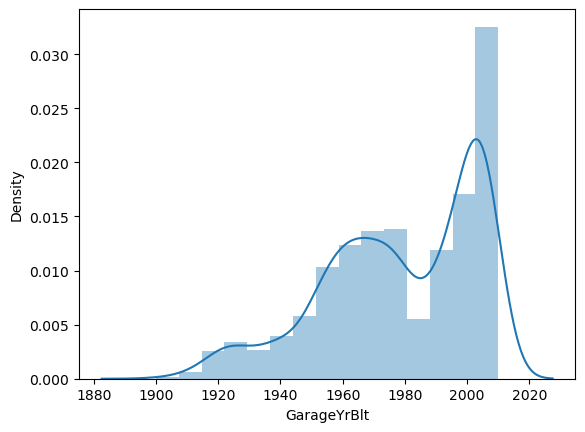

In [57]:
sns.distplot(df.GarageYrBlt)
plt.show()

In [58]:
df.GarageYrBlt.value_counts()

GarageYrBlt
2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1927.0     1
1900.0     1
1906.0     1
1908.0     1
1933.0     1
Name: count, Length: 97, dtype: int64

1. 'GarageYrBlt' has a lot of unique values and the values that are missing cannot be replace by a number <br> because for those entries, the data does not exists
2. It has be accounted for as missing data which is also part of the structure of the data
3. So, we are creating 4 bins to include all the values and create another bin to account for missing values

In [59]:
# Making a function to make bins

GarageYrBlt_Cat = df.GarageYrBlt
def func(x):
    if x < 1930:
        return "1900-1930"
    if x < 1960:
        return "1930-1960"
    if x < 1990:
        return "1960-1990"
    if x < 2020:
        return "1990-2020"

In [60]:
# Applying the function and replacing the missing values with "NA"

GarageYrBlt_Cat = GarageYrBlt_Cat.apply(func).fillna("NA")

In [61]:
# finding the index of "GarageYrBlt" so that we can insert new column right next to it

for i, col in enumerate(df.columns):
    if col == "GarageYrBlt":
        print(i)
        break

59


In [62]:
# insert the derived column right next to the original column

df.insert(60, "GarageYrBlt_Cat", GarageYrBlt_Cat)

In [63]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageYrBlt_Cat,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2003.0,1990-2020,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NA,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,1960-1990,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,1990-2020,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NA,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,1990-2020,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,1990-2020,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NA,NA,NA,0,12,2008,WD,Normal,250000


In [64]:
df.GarageYrBlt_Cat.isna().sum()

0

In [65]:
# removing the original column

df.drop(columns="GarageYrBlt", inplace=True)

In [66]:
# 'GarageFinish'
df.GarageFinish.isna().sum()

81

In [67]:
df.GarageFinish.value_counts()

GarageFinish
Unf    605
RFn    422
Fin    352
Name: count, dtype: int64

1. 'GarageFinish' stands for interior finish of the garage
2. There is a NA category in data dictionary, so replace the missing values with "NA"

In [68]:
df.GarageFinish = df.GarageFinish.fillna("NA")

In [69]:
df.GarageFinish.isna().sum()

0

In [70]:
# GarageQual
df.GarageQual.isna().sum()

81

In [71]:
df.GarageQual.value_counts()

GarageQual
TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: count, dtype: int64

Replacing the missing values with "NA" which means that there is no garage

In [72]:
df.GarageQual = df.GarageQual.fillna("NA")

In [73]:
df.GarageQual.isna().sum()

0

In [74]:
# 'GarageCond'
df.GarageCond.isna().sum()

81

In [75]:
df.GarageCond.value_counts()

GarageCond
TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: count, dtype: int64

Replacing the missing values with "NA" which means that there is no garage


In [76]:
df.GarageCond = df.GarageCond.fillna("NA")

In [77]:
df.GarageCond.isna().sum()

0

In [78]:
df.columns[df.isna().sum() > 0]

Index([], dtype='object')

##### There are no missing values in the dataset. <br> We have handeled all data mismatches, now let's proceed.


In [79]:
df.duplicated().sum()

0

#### There are no duplicate rows in the data

In [80]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt_Cat,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,1990-2020,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NA,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1960-1990,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,1990-2020,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NA,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1990-2020,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,1990-2020,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NA,NA,NA,0,12,2008,WD,Normal,250000


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               1460 non-null   int64  
 1   MSSubClass       1460 non-null   int64  
 2   MSZoning         1460 non-null   object 
 3   LotFrontage      1460 non-null   float64
 4   LotArea          1460 non-null   int64  
 5   Street           1460 non-null   object 
 6   Alley            1460 non-null   object 
 7   LotShape         1460 non-null   object 
 8   LandContour      1460 non-null   object 
 9   Utilities        1460 non-null   object 
 10  LotConfig        1460 non-null   object 
 11  LandSlope        1460 non-null   object 
 12  Neighborhood     1460 non-null   object 
 13  Condition1       1460 non-null   object 
 14  Condition2       1460 non-null   object 
 15  BldgType         1460 non-null   object 
 16  HouseStyle       1460 non-null   object 
 17  OverallQual   

The data needs to be in the form of numbers so we need to make some changes to the categorical columns as mentioned below:- <br>
    1. Ordered Categorical --- Label Encoding <br>
    2. Unordered Categorical --- Dummy Variable Creation

##### Label Encoding

In [82]:
df.select_dtypes(include="object").columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt_Cat', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'], dtype='object')

First we will do Label Encoding for Ordered Categorical columns

In [83]:
# LotShape
df.LotShape.value_counts()

LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64

- 'LotShape' denotes general shape of property which has 4 classes from irregular to regular
- It can be converted to ordered categorical variable which denotes are level of regularity of the plot

In [84]:
# giving scores to each classes ranging from 1 to 4

def func(x):
    if x == "Reg":
        return 4
    elif x == "IR1":
        return 3
    elif x == "IR2":
        return 2
    else:
        return 1

# Applying the above function to the column 

df.LotShape = df.LotShape.apply(func)

In [85]:
#'LandContour'
df.LandContour.value_counts()

LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64

'LandContour' refers to the flatness of the property

In [86]:
def func(x):
    if x == "Lvl":
        return 4
    if x == "Bnk":
        return 3
    if x == "HLS":
        return 2
    if x == "Low":
        return 1
    
df.LandContour = df.LandContour.apply(func)

In [87]:
# LandSlope
df.LandSlope.value_counts()

LandSlope
Gtl    1382
Mod      65
Sev      13
Name: count, dtype: int64

'LandSlope' refers to the slope of property

In [88]:
def func(x):
    if x == "Gtl":
        return 1
    if x == "Mod":
        return 2
    if x == "Sev":
        return 3
    
df.LandSlope = df.LandSlope.apply(func)

- 'Neighborhood', 'Condition1' and 'Condition2' have a lot of classes which are specific to each location of the property
- So, these columns will only increase the complexity of the model so we can remove them

In [89]:
# dropping column with too many classes which are specific to each location

df.drop(columns=["Neighborhood", "Condition1", "Condition2"], inplace=True)

In [90]:
# HouseStyle
df.HouseStyle.value_counts()

HouseStyle
1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: count, dtype: int64

'HouseStyle' represents the number of stories

In [91]:
# dictionary mapping strings to integers

dct = {"1Story":1, "1.5Unf":1.25, "1.5Fin":1.75, "2Story":2, "2.5Unf":2.25, "2.5Fin":2.75, "SFoyer":3, "SLvl":3.5}

# applying the dictionary to each value in the column

df.HouseStyle = df.HouseStyle.apply(lambda x : dct[x])

- 'Exterior1st' and 'Exterior2nd' have a lot of classes which does not seem important to me so I'll remove these two columns

In [92]:
df.drop(columns=["Exterior1st", "Exterior2nd"], inplace=True)

In [93]:
# ExterQual
df.ExterQual.value_counts()

ExterQual
TA    906
Gd    488
Ex     52
Fa     14
Name: count, dtype: int64

'ExterQual' refers to the quality of the material on the exterior

In [94]:
dct = {"Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5}
df.ExterQual = df.ExterQual.apply(lambda x : dct[x])

In [95]:
# ExterCond
df.ExterCond.value_counts()

ExterCond
TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: count, dtype: int64

'ExterCond' refers to the condition of the exterior material

In [96]:
dct = {"Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5}
df.ExterCond = df.ExterCond.apply(lambda x : dct[x])

In [97]:
# BsmtQual
df.BsmtQual.value_counts()

BsmtQual
TA    649
Gd    618
Ex    121
NA     37
Fa     35
Name: count, dtype: int64

'BsmtQual' refers to the height of the basement

In [98]:
dct = {"NA":0, "Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5}
df.BsmtQual = df.BsmtQual.apply(lambda x : dct[x])

In [99]:
# BsmtCond
df.BsmtCond.value_counts()

BsmtCond
TA    1311
Gd      65
Fa      45
NA      37
Po       2
Name: count, dtype: int64

'BsmtCond' refers to the general condition of the basement

In [100]:
dct = {"NA":0, "Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5}
df.BsmtCond = df.BsmtCond.apply(lambda x : dct[x])

In [101]:
# BsmtExposure
df.BsmtExposure.value_counts()

BsmtExposure
No    953
Av    221
Gd    134
Mn    114
NA     38
Name: count, dtype: int64

'BsmtExposure' refers to walkout or garden level walls

In [102]:
dct = {"NA":0, "No":1, "Mn":2, "Av":3, "Gd":4}
df.BsmtExposure = df.BsmtExposure.apply(lambda x : dct[x])

In [103]:
df.select_dtypes(include="object").columns

Index(['MSZoning', 'Street', 'Alley', 'Utilities', 'LotConfig', 'BldgType', 'RoofStyle', 'RoofMatl', 'MasVnrType', 'Foundation', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt_Cat', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'], dtype='object')

In [104]:
# BsmtFinType1
df.BsmtFinType1.value_counts()

BsmtFinType1
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
NA      37
Name: count, dtype: int64

'BsmtFinType1' refers to the rating of basement finished area

In [105]:
dct = {"NA":0, "Unf":1, "LwQ":2, "Rec":3, "BLQ":4, "ALQ":5, "GLQ":6}
df.BsmtFinType1 = df.BsmtFinType1.apply(lambda x : dct[x])

In [106]:
#'BsmtFinType2'
df.BsmtFinType2.value_counts()

BsmtFinType2
Unf    1256
Rec      54
LwQ      46
NA       38
BLQ      33
ALQ      19
GLQ      14
Name: count, dtype: int64

'BsmtFinType2' refers to the rating of basement finished area (if multiple types)

In [107]:
dct = {"NA":0, "Unf":1, "LwQ":2, "Rec":3, "BLQ":4, "ALQ":5, "GLQ":6}
df.BsmtFinType2 = df.BsmtFinType2.apply(lambda x : dct[x])

In [108]:
# HeatingQC
df.HeatingQC.value_counts()

HeatingQC
Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: count, dtype: int64

'HeatingQC' refers to heating quality and condition

In [109]:
dct = {"Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5}
df.HeatingQC = df.HeatingQC.apply(lambda x : dct[x])

In [110]:
#CentralAir
df.CentralAir.value_counts()

CentralAir
Y    1365
N      95
Name: count, dtype: int64

'CentralAir' refers to existence of central air conditioning

In [111]:
df.CentralAir = df.CentralAir.apply(lambda x : 1 if x == "Y" else 0)

In [112]:
#KitchenQual
df.KitchenQual.value_counts()

KitchenQual
TA    735
Gd    586
Ex    100
Fa     39
Name: count, dtype: int64

In [113]:
dct = {"Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5}
df.KitchenQual = df.KitchenQual.apply(lambda x : dct[x])

In [114]:
#Functional
df.Functional.value_counts()

Functional
Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: count, dtype: int64

'Functional' refers to Home functionality

In [115]:
dct = {"Sal":1, "Sev":2, "Maj2":3, "Maj1":4, "Mod":5, "Min2":6, "Min1":7, "Typ":8}
df.Functional = df.Functional.apply(lambda x : dct[x])

In [116]:
# FireplaceQu
df.FireplaceQu.value_counts()

FireplaceQu
NA    690
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64

'FireplaceQu' refers to fireplace quality

In [117]:
dct = {"NA":0, "Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5}
df.FireplaceQu = df.FireplaceQu.apply(lambda x : dct[x])

In [118]:
#GarageYrBlt_Cat
df.GarageYrBlt_Cat.value_counts()

GarageYrBlt_Cat
1990-2020    598
1960-1990    466
1930-1960    247
NA            81
1900-1930     68
Name: count, dtype: int64

'GarageYrBlt_Cat' refers to the year garage was built

In [119]:
dct = {"NA":0, "1900-1930":1, "1930-1960":2, "1960-1990":3, "1990-2020":4}
df.GarageYrBlt_Cat = df.GarageYrBlt_Cat.apply(lambda x : dct[x])

In [120]:
#GarageFinish
df.GarageFinish.value_counts()

GarageFinish
Unf    605
RFn    422
Fin    352
NA      81
Name: count, dtype: int64

'GarageFinish' refers to interior finish of the garage`m

In [121]:
dct = {"NA":0, "Unf":1, "RFn":2, "Fin":3}
df.GarageFinish = df.GarageFinish.apply(lambda x : dct[x])

In [122]:
#GarageQual
df.GarageQual.value_counts()

GarageQual
TA    1311
NA      81
Fa      48
Gd      14
Ex       3
Po       3
Name: count, dtype: int64

'GarageQual' refers to the quality of the garage

In [123]:
dct = {"NA":0, "Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5}
df.GarageQual = df.GarageQual.apply(lambda x : dct[x])

In [124]:
#'GarageCond'
df.GarageCond.value_counts()

GarageCond
TA    1326
NA      81
Fa      35
Gd       9
Po       7
Ex       2
Name: count, dtype: int64

In [125]:
# 'GarageCond' refers to the condition of the garage
dct = {"NA":0, "Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5}
df.GarageCond = df.GarageCond.apply(lambda x : dct[x])

In [126]:
#PavedDrive
df.PavedDrive.value_counts()

PavedDrive
Y    1340
N      90
P      30
Name: count, dtype: int64

In [127]:
# 'PavedDrive' refers to paved driveway
dct = {"N":0, "P":1, "Y":2}
df.PavedDrive = df.PavedDrive.apply(lambda x : dct[x])

In [128]:
#PoolQC
df.PoolQC.value_counts()

PoolQC
NA    1453
Gd       3
Ex       2
Fa       2
Name: count, dtype: int64

In [129]:
# 'PoolQC' refers to pool quality
dct = {"NA":0, "Fa":1, "TA":2, "Gd":3, "Ex":4}
df.PoolQC = df.PoolQC.apply(lambda x : dct[x])

In [130]:
#Fence
df.Fence.value_counts()

Fence
NA       1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: count, dtype: int64

In [131]:
#'Fence' refers to the quality of the fence
dct = {"NA":0, "MnWw":1, "GdWo":2, "MnPrv":3, "GdPrv":4}
df.Fence = df.Fence.apply(lambda x : dct[x])

1. 'SaleType' refers to type of sale which is related to the type of transaction/payment
2. The price of the property won't depend on the type of transaction so removing this column

In [132]:
df.drop(columns=["SaleType"], inplace=True)

In [133]:
df.select_dtypes(include="object").columns

Index(['MSZoning', 'Street', 'Alley', 'Utilities', 'LotConfig', 'BldgType', 'RoofStyle', 'RoofMatl', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'GarageType', 'MiscFeature', 'SaleCondition'], dtype='object')

#### All the remaining columns are unordered categorical columns

#### Dummy Variable Creation

In [134]:
pd.options.display.max_columns = 150

In [135]:
df1 = pd.get_dummies(df, drop_first=True)

In [136]:
df1.head()

,Id,MSSubClass,LotFrontage,LotArea,LotShape,LandContour,LandSlope,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt_Cat,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NA,Alley_Pave,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,MasVnrType_BrkFace,MasVnrType_NA,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,MiscFeature_NA,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,4,4,1,2.0,7,5,2003,2003,196.0,4,3,4,3,1,6,706,1,0,150,856,5,1,856,854,0,1710,1,0,2,1,3,1,4,8,8,0,0,4,2,2,548,3,3,2,0,61,0,0,0,0,0,0,0,2,2008,208500,False,False,True,False,True,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False
1,2,20,80.0,9600,4,4,1,1.0,6,8,1976,1976,0.0,3,3,4,3,4,5,978,1,0,284,1262,5,1,1262,0,0,1262,0,1,2,0,3,1,3,6,8,1,3,3,2,2,460,3,3,2,298,0,0,0,0,0,0,0,0,5,2007,181500,False,False,True,False,True,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False
2,3,60,68.0,11250,3,4,1,2.0,7,5,2001,2002,162.0,4,3,4,3,2,6,486,1,0,434,920,5,1,920,866,0,1786,1,0,2,1,3,1,4,6,8,1,3,4,2,2,608,3,3,2,0,42,0,0,0,0,0,0,0,9,2008,223500,False,False,True,False,True,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False
3,4,70,60.0,9550,3,4,1,2.0,7,5,1915,1970,0.0,3,3,3,4,1,5,216,1,0,540,756,4,1,961,756,0,1717,1,0,1,0,3,1,4,7,8,1,4,4,1,3,642,3,3,2,0,35,272,0,0,0,0,0,0,2,2006,140000,False,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False
4,5,60,84.0,14260,3,4,1,2.0,8,5,2000,2000,350.0,4,3,4,3,3,6,655,1,0,490,1145,5,1,1145,1053,0,2198,1,0,2,1,4,1,4,9,8,1,3,4,2,3,836,3,3,2,192,84,0,0,0,0,0,0,0,12,2008,250000,False,False,True,False,True,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,Fal

Changing the location of target column to the end

In [137]:
target = df.SalePrice
df1.drop(columns="SalePrice", inplace=True)
df1.insert(119, "SalePrice", target)

In [138]:
df1.head()

,Id,MSSubClass,LotFrontage,LotArea,LotShape,LandContour,LandSlope,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt_Cat,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NA,Alley_Pave,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,MasVnrType_BrkFace,MasVnrType_NA,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,MiscFeature_NA,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,1,60,65.0,8450,4,4,1,2.0,7,5,2003,2003,196.0,4,3,4,3,1,6,706,1,0,150,856,5,1,856,854,0,1710,1,0,2,1,3,1,4,8,8,0,0,4,2,2,548,3,3,2,0,61,0,0,0,0,0,0,0,2,2008,False,False,True,False,True,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,208500
1,2,20,80.0,9600,4,4,1,1.0,6,8,1976,1976,0.0,3,3,4,3,4,5,978,1,0,284,1262,5,1,1262,0,0,1262,0,1,2,0,3,1,3,6,8,1,3,3,2,2,460,3,3,2,298,0,0,0,0,0,0,0,0,5,2007,False,False,True,False,True,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,181500
2,3,60,68.0,11250,3,4,1,2.0,7,5,2001,2002,162.0,4,3,4,3,2,6,486,1,0,434,920,5,1,920,866,0,1786,1,0,2,1,3,1,4,6,8,1,3,4,2,2,608,3,3,2,0,42,0,0,0,0,0,0,0,9,2008,False,False,True,False,True,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,223500
3,4,70,60.0,9550,3,4,1,2.0,7,5,1915,1970,0.0,3,3,3,4,1,5,216,1,0,540,756,4,1,961,756,0,1717,1,0,1,0,3,1,4,7,8,1,4,4,1,3,642,3,3,2,0,35,272,0,0,0,0,0,0,2,2006,False,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,140000
4,5,60,84.0,14260,3,4,1,2.0,8,5,2000,2000,350.0,4,3,4,3,3,6,655,1,0,490,1145,5,1,1145,1053,0,2198,1,0,2,1,4,1,4,9,8,1,3,4,2,3,836,3,3,2,192,84,0,0,0,0,0,0,0,12,2008,False,False,True,False,True,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,Fals

In [139]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 120 entries, Id to SalePrice
dtypes: bool(60), float64(3), int64(57)
memory usage: 770.1 KB


### Train Test Split

In [140]:
df1.shape

(1460, 120)

In [141]:
df1 = df1.replace({True: 1, False: 0})

In [142]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 120 entries, Id to SalePrice
dtypes: float64(3), int64(117)
memory usage: 1.3 MB


In [143]:
df1.head()

,Id,MSSubClass,LotFrontage,LotArea,LotShape,LandContour,LandSlope,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt_Cat,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NA,Alley_Pave,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,MasVnrType_BrkFace,MasVnrType_NA,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,MiscFeature_NA,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,1,60,65.0,8450,4,4,1,2.0,7,5,2003,2003,196.0,4,3,4,3,1,6,706,1,0,150,856,5,1,856,854,0,1710,1,0,2,1,3,1,4,8,8,0,0,4,2,2,548,3,3,2,0,61,0,0,0,0,0,0,0,2,2008,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,208500
1,2,20,80.0,9600,4,4,1,1.0,6,8,1976,1976,0.0,3,3,4,3,4,5,978,1,0,284,1262,5,1,1262,0,0,1262,0,1,2,0,3,1,3,6,8,1,3,3,2,2,460,3,3,2,298,0,0,0,0,0,0,0,0,5,2007,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,181500
2,3,60,68.0,11250,3,4,1,2.0,7,5,2001,2002,162.0,4,3,4,3,2,6,486,1,0,434,920,5,1,920,866,0,1786,1,0,2,1,3,1,4,6,8,1,3,4,2,2,608,3,3,2,0,42,0,0,0,0,0,0,0,9,2008,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,223500
3,4,70,60.0,9550,3,4,1,2.0,7,5,1915,1970,0.0,3,3,3,4,1,5,216,1,0,540,756,4,1,961,756,0,1717,1,0,1,0,3,1,4,7,8,1,4,4,1,3,642,3,3,2,0,35,272,0,0,0,0,0,0,2,2006,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,140000
4,5,60,84.0,14260,3,4,1,2.0,8,5,2000,2000,350.0,4,3,4,3,3,6,655,1,0,490,1145,5,1,1145,1053,0,2198,1,0,2,1,4,1,4,9,8,1,3,4,2,3,836,3,3,2,192,84,0,0,0,0,0,0,0,12,2008,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,250000


In [144]:
# splitting the dataset into training and test
train_df, test_df = train_test_split(df1, train_size=1100, random_state=100)

In [145]:
print(train_df.shape)
print(test_df.shape)

(1100, 120)
(360, 120)


In [146]:
# splitting the training and testing dataset into respective inputs and targets

x_train = train_df.iloc[:, :119]
y_train = train_df.iloc[:, 119]

x_test = test_df.iloc[:, :119]
y_test = test_df.iloc[:, 119]

### Normalization

In [147]:
x_train.shape

(1100, 119)

In [148]:
x_test.shape

(360, 119)

In [149]:
pd.options.display.max_seq_items = 150

In [150]:
x_train.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'LandContour', 'LandSlope', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageYrBlt_Cat', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscVal', 'MoSold', 'YrSold', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Pave', 'Alley_NA', 'Alley_Pave', 'Utilities_NoSeWa', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3',
       

In [151]:
x_train.head(10)

,Id,MSSubClass,LotFrontage,LotArea,LotShape,LandContour,LandSlope,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt_Cat,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NA,Alley_Pave,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,MasVnrType_BrkFace,MasVnrType_NA,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,MiscFeature_NA,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
398,399,30,60.0,8967,4,4,1,1.00,5,2,1920,1950,0.0,3,2,2,1,1,1,0,1,0,961,961,4,1,1077,0,0,1077,0,0,1,0,2,1,3,6,3,0,0,1,1,1,338,1,1,0,0,0,0,0,0,0,0,0,0,11,2007,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
165,166,190,62.0,10106,4,4,1,1.75,5,7,1940,1999,0.0,3,4,3,3,1,5,351,3,181,112,644,4,1,808,547,0,1355,1,0,2,0,4,2,3,6,8,0,0,0,0,0,0,0,0,2,140,0,0,0,0,0,0,0,0,9,2008,0,0,1,0,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
213,214,20,43.0,13568,2,4,1,1.00,5,5,1995,1995,0.0,3,3,4,3,1,5,716,1,0,274,990,5,1,990,0,0,990,0,1,1,0,3,1,3,5,8,0,0,4,1,2,576,3,3,2,224,0,0,0,0,0,0,0,0,7,2006,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
950,951,20,60.0,7200,4,4,1,1.00,5,8,1950,2002,0.0,3,3,3,3,1,5,398,4,149,317,864,4,1,864,0,0,864,1,0,1,0,3,1,4,5,8,0,0,3,2,2,720,3,3,2,194,0,0,0,0,0,0,0,0,7,2007,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0
552,553,20,87.0,11146,3,4,1,1.00,8,5,2006,2006,250.0,4,3,5,3,3,1,0,1,0,1709,1709,5,1,1717,0,0,1717,0,0,2,0,3,1,4,7,8,1,4,4,2,3,908,3,3,2,169,39,0,0,0,0,0,0,0,7,2009,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
774,775,20,110.0,14226,4,4,1,1.00,8,5,2006,2006,375.0,4,3,4,3,3,1,0,1,0,1935,1935,4,1,1973,0,0,1973,0,0,2,0,3,1,4,9,8,1,4,4,3,3,895,3,3,2,315,45,0,0,0,0,0,0,0,7,2007,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
92,93,30,80.0,13360,3,2,1,1.00,5,7,1921,2006,0.0,3,4,4,3,1,5,713,1,0,163,876,5,1,964,0,0,964,1,0,1,0,2,1,3,5,8,0,0,1,1,2,432,3,3,2,0,0,44,0,0,0,0,0,0,8,2009,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0
360,361,85,69.0,7540,3,4,1,3.00,6,6,1978,1978,0.0,3,3,4,3,3,6,773,1,0,115,888,5,1,912,0,0,912,1,0,1,0,2,1,3,5,8,1,3,3,2,2,470,3,3,2,0,0,0,0,192,0,0,3,0,6,2007,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
549,550,60,75.0,9375,4,4,1,2.00,7,5,2003,2004,0.0,4,3,4,3,1,1,0,1,0,912,912,5,1,912,1182,0,2094,0,0,2,1,4,1,4,8,8,1,4,4,3,2,615,3,3,2,182,182,0,0,0,0,0,0

In [152]:
# these are columns whose value range outside [0, 1]

cols_to_normalize = ['MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'LandContour',
       'LandSlope', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
        '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageYrBlt_Cat', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscVal', 'MoSold',
       'YrSold']

In [153]:
# Min Max Scaling
sc = MinMaxScaler()

# only fitting on the training data
sc = sc.fit(x_train[cols_to_normalize])
x_train[cols_to_normalize] = sc.transform(x_train[cols_to_normalize])

# normalizing test data with object fit on training data
x_test[cols_to_normalize] = sc.transform(x_test[cols_to_normalize])

In [154]:
x_train.head()

,Id,MSSubClass,LotFrontage,LotArea,LotShape,LandContour,LandSlope,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt_Cat,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NA,Alley_Pave,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,MasVnrType_BrkFace,MasVnrType_NA,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,MiscFeature_NA,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
398,399,0.058824,0.133562,0.035836,1.000000,1.0,0.0,0.0,0.444444,0.125,0.347826,0.000000,0.00000,0.333333,0.000000,0.4,0.25,0.25,0.166667,0.000000,0.166667,0.000000,0.411387,0.157283,0.75,1,0.163194,0.000000,0.0,0.122790,0.000000,0.0,0.333333,0.0,0.250,0.0,0.333333,0.272727,0.166667,0.000000,0.0,0.25,0.333333,0.25,0.238364,0.2,0.2,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.909091,0.25,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
165,166,1.000000,0.140411,0.041160,1.000000,1.0,0.0,0.3,0.444444,0.750,0.492754,0.816667,0.00000,0.333333,0.666667,0.6,0.75,0.25,0.833333,0.062190,0.500000,0.122795,0.047945,0.105401,0.75,1,0.100926,0.264891,0.0,0.176211,0.333333,0.0,0.666667,0.0,0.500,0.5,0.333333,0.272727,1.000000,0.000000,0.0,0.00,0.000000,0.00,0.000000,0.0,0.0,1.0,0.163361,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.727273,0.50,0,0,1,0,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
213,214,0.000000,0.075342,0.057342,0.333333,1.0,0.0,0.0,0.444444,0.500,0.891304,0.750000,0.00000,0.333333,0.333333,0.8,0.75,0.25,0.833333,0.126860,0.166667,0.000000,0.117295,0.162029,1.00,1,0.143056,0.000000,0.0,0.106072,0.000000,0.5,0.333333,0.0,0.375,0.0,0.333333,0.181818,1.000000,0.000000,0.0,1.00,0.333333,0.50,0.406206,0.6,0.6,1.0,0.261377,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.545455,0.00,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
950,951,0.000000,0.133562,0.027577,1.000000,1.0,0.0,0.0,0.444444,0.875,0.565217,0.866667,0.00000,0.333333,0.333333,0.6,0.75,0.25,0.833333,0.070517,0.666667,0.101085,0.135702,0.141408,0.75,1,0.113889,0.000000,0.0,0.081860,0.333333,0.0,0.333333,0.0,0.375,0.0,0.666667,0.181818,1.000000,0.000000,0.0,0.75,0.666667,0.50,0.507757,0.6,0.6,1.0,0.226371,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.545455,0.25,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0
552,553,0.000000,0.226027,0.046021,0.666667,1.0,0.0,0.0,0.777778,0.500,0.971014,0.933333,0.15625,0.666667,0.333333,1.0,0.75,0.75,0.166667,0.000000,0.166667,0.000000,0.731592,0.279705,1.00,1,0.311343,0.000000,0.0,0.245772,0.000000,0.0,0.666667,0.0,0.375,0.0,0.666667,0.363636,1.000000,0.333333,0.8,1.00,0.666667,0.75,0.640339,0.6,0.6,1.0,0.

In [155]:
# Dropping the "Id" columns because it is unique for every sample

x_train.drop(columns=["Id"], inplace=True)
x_test.drop(columns=["Id"], inplace=True)

In [156]:
x_test.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LandContour,LandSlope,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt_Cat,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NA,Alley_Pave,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,MasVnrType_BrkFace,MasVnrType_NA,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,MiscFeature_NA,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1436,0.000000,0.133562,0.035991,1.000000,1.0,0.0,0.0,0.333333,0.625,0.717391,0.350000,0.00000,0.333333,0.333333,0.6,0.75,0.25,0.833333,0.109142,0.166667,0.0,0.106164,0.141408,0.50,1,0.113889,0.000000,0.0,0.081860,0.000000,0.0,0.333333,0.0,0.375,0.0,0.333333,0.181818,1.0,0.000000,0.0,0.75,0.333333,0.50,0.372355,0.6,0.6,1.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.00,0.5,0.0,0.363636,0.25,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0
57,0.235294,0.232877,0.048354,0.666667,1.0,0.0,0.4,0.666667,0.500,0.956522,0.900000,0.00000,0.666667,0.333333,0.8,0.75,0.25,0.166667,0.000000,0.166667,0.0,0.368151,0.140753,1.00,1,0.112963,0.416465,0.0,0.246349,0.000000,0.0,0.666667,0.5,0.375,0.0,0.666667,0.363636,1.0,0.000000,0.0,1.00,0.666667,0.50,0.398449,0.6,0.6,1.0,0.000000,0.133843,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.636364,0.00,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
780,0.000000,0.143836,0.030732,1.000000,1.0,0.0,0.0,0.666667,0.500,0.891304,0.766667,0.02375,0.333333,0.333333,0.8,1.00,0.25,0.166667,0.000000,0.166667,0.0,0.529538,0.202455,0.75,1,0.203935,0.000000,0.0,0.156610,0.000000,0.0,0.666667,0.0,0.375,0.0,0.333333,0.272727,1.0,0.333333,0.6,1.00,1.000000,0.50,0.283498,0.6,0.6,1.0,0.256709,0.040153,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.454545,0.25,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
382,0.235294,0.198630,0.037136,0.666667,1.0,0.0,0.4,0.666667,0.500,0.971014,0.933333,0.00000,0.666667,0.333333,0.8,0.75,0.75,0.166667,0.000000,0.166667,0.0,0.401969,0.153682,1.00,1,0.131250,0.415496,0.0,0.261145,0.000000,0.0,0.666667,0.5,0.375,0.0,0.666667,0.454545,1.0,0.000000,0.0,1.00,0.666667,0.50,0.450635,0.6,0.6,1.0,0.168028,0.101338,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.272727,0.25,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1170,0.352941,0.188356,0.040104,1.000000,1.0,0.0,1.0,0.555556,0.625,0.760870,0.450000,0.00000,0.333333,0.333333,0.6,0.75,0.75,0.833333,0.092488,0.166667,0.0,0.245719,0.179378,0.50,1,0.172685,0.000000,0.0,0.130669,0.333333,0.0,0.333333,0.0,0.375,0.0,0.333333,0.272727,1.0,0.333333,0.2,0.75,1.000000,0.25,0.252468,0.6,0.6,1.0,0.236873,0.000000,0.0,0.0,0.0,0.888889,0.75,1.

# Model Building

### Linear Regression

In [157]:
lnr = LinearRegression()

lnr = lnr.fit(x_train, y_train)

We'll use recursive feature elimination technique to eliminate the insignificant feature

In [158]:
rfe = RFE(lnr, n_features_to_select=20)
rfe = rfe.fit(x_train, y_train)

In [159]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 16),
 ('LotFrontage', False, 34),
 ('LotArea', True, 1),
 ('LotShape', False, 94),
 ('LandContour', False, 48),
 ('LandSlope', False, 47),
 ('HouseStyle', False, 37),
 ('OverallQual', True, 1),
 ('OverallCond', False, 11),
 ('YearBuilt', False, 12),
 ('YearRemodAdd', False, 98),
 ('MasVnrArea', False, 10),
 ('ExterQual', True, 1),
 ('ExterCond', False, 31),
 ('BsmtQual', False, 6),
 ('BsmtCond', False, 7),
 ('BsmtExposure', False, 17),
 ('BsmtFinType1', False, 81),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinType2', False, 55),
 ('BsmtFinSF2', False, 32),
 ('BsmtUnfSF', False, 33),
 ('TotalBsmtSF', True, 1),
 ('HeatingQC', False, 69),
 ('CentralAir', False, 70),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 30),
 ('GrLivArea', False, 27),
 ('BsmtFullBath', False, 38),
 ('BsmtHalfBath', False, 88),
 ('FullBath', False, 71),
 ('HalfBath', False, 84),
 ('BedroomAbvGr', False, 8),
 ('KitchenAbvGr', False, 3),
 ('KitchenQual', False, 15),
 ('TotRmsA

In [160]:
pref_cols = x_train.columns[rfe.support_]
pref_cols

Index(['LotArea', 'OverallQual', 'ExterQual', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'PoolQC', 'MiscVal', 'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Heating_OthW', 'MiscFeature_NA', 'MiscFeature_Othr', 'MiscFeature_Shed'], dtype='object')

We'll use statsmodels to see which variables have high p-value

In [161]:
x_train_rfe = x_train[pref_cols]

x_train_rfe = sm.add_constant(x_train_rfe)

lm = sm.OLS(y_train, x_train_rfe)

lm = lm.fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     256.9
Date:                Wed, 24 Apr 2024   Prob (F-statistic):               0.00
Time:                        20:58:17   Log-Likelihood:                -12997.
No. Observations:                1100   AIC:                         2.604e+04
Df Residuals:                    1079   BIC:                         2.614e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -8.39e+05   7.88e+04    -10.652      0.000   -9.94e+05   -6.84e+05
LotArea            1.29e+05   2.34e+04      5.503      0.000     8.3e+04    1.75e+05
OverallQual       1.643e+05   1.09e+04     15.127      0.000    1.43e+05    1.86e+05
ExterQual         8.417e+04   7765.213     10.840      0.000    6.89e+04    9.94e+04
BsmtFinSF1        1.552e+05   1.49e+04     10.410      0.000    1.26e+05    1.84e+05
TotalBsmtSF       1.266e+05   2.77e+04      4.575      0.000    7.23e+04    1.81e+05
1stFlrSF          2.555e+05   2.01e+04     12.744      0.000    2.16e+05    2.95e+05
2ndFlrSF          1.079e+05   5743.061     18.788      0.000    9.66e+04    1.19e+05
PoolQC            7.146e+04   2.35e+04      3.036      0.002    2.53e+04    1.18e+05
MiscVal           8.208e+04   8.14e+04      1.008      0.314   -7.77e+04    2.42e+05
RoofMatl_CompShg  7.105e+05   3.98e+04     17.837      0.000    6.32e+05    7.89e+05
RoofMatl_Membran  7.544e+05   5.19e+04     14.532      0.000    6.53e+05    8.56e+05
RoofMatl_Metal    7.336e+05   5.18e+04     14.163      0.000    6.32e+05    8.35e+05
RoofMatl_Roll     6.866e+05   5.17e+04     13.290      0.000    5.85e+05    7.88e+05
RoofMatl_Tar&Grv  7.094e+05    4.2e+04     16.886      0.000    6.27e+05    7.92e+05
RoofMatl_WdShake  6.872e+05   4.33e+04     15.889      0.000    6.02e+05    7.72e+05
RoofMatl_WdShngl  7.601e+05   4.19e+04     18.129      0.000    6.78e+05    8.42e+05
Heating_OthW     -7.709e+04   2.35e+04     -3.276      0.001   -1.23e+05   -3.09e+04
MiscFeature_NA    7.218e+04   6.69e+04      1.079      0.281    -5.9e+04    2.03e+05
MiscFeature_Othr  6.442e+04   6.29e+04      1.024      0.306    -5.9e+04    1.88e+05
MiscFeature_Shed  6.874e+04    6.4e+04      1.074      0.283   -5.69e+04    1.94e+05
==============================================================================
Omnibus:                      427.202   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            29979.690
Skew:                          -0.905   Prob(JB):                         0.00
Kurtosis:                      28.511   Cond. No.                         290.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [162]:
def get_vif(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif["VIF"] = round(vif["VIF"], 2)
    vif = vif.sort_values(by="VIF", ascending=False)
    return vif

In [163]:
get_vif(x_train[pref_cols])

,Features,VIF
17,MiscFeature_NA,1137.67
9,RoofMatl_CompShg,1132.58
1,OverallQual,40.44
19,MiscFeature_Shed,36.92
4,TotalBsmtSF,27.03
5,1stFlrSF,17.06
2,ExterQual,15.30
13,RoofMatl_Tar&Grv,7.28
15,RoofMatl_WdShngl,6.12
14,RoofMatl_WdShake,5.24


'MiscFeature_NA' has high p-value and VIF value so we'll remove this feature

In [164]:
# removing 'MiscFeature_NA'

x_train_rfe = x_train[pref_cols].drop(columns=["MiscFeature_NA"])

x_train_rfe = sm.add_constant(x_train_rfe)

lm = sm.OLS(y_train, x_train_rfe)

lm = lm.fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     270.3
Date:                Wed, 24 Apr 2024   Prob (F-statistic):               0.00
Time:                        20:58:17   Log-Likelihood:                -12997.
No. Observations:                1100   AIC:                         2.603e+04
Df Residuals:                    1080   BIC:                         2.613e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -7.66e+05   4.04e+04    -18.981      0.000   -8.45e+05   -6.87e+05
LotArea           1.291e+05   2.34e+04      5.505      0.000    8.31e+04    1.75e+05
OverallQual       1.652e+05   1.08e+04     15.252      0.000    1.44e+05    1.86e+05
ExterQual         8.408e+04   7765.306     10.827      0.000    6.88e+04    9.93e+04
BsmtFinSF1        1.555e+05   1.49e+04     10.431      0.000    1.26e+05    1.85e+05
TotalBsmtSF       1.251e+05   2.76e+04      4.525      0.000    7.08e+04    1.79e+05
1stFlrSF          2.551e+05      2e+04     12.726      0.000    2.16e+05    2.94e+05
2ndFlrSF          1.074e+05   5721.142     18.765      0.000    9.61e+04    1.19e+05
PoolQC            7.176e+04   2.35e+04      3.048      0.002    2.56e+04    1.18e+05
MiscVal           -238.9793   2.86e+04     -0.008      0.993   -5.63e+04    5.58e+04
RoofMatl_CompShg  7.096e+05   3.98e+04     17.817      0.000    6.31e+05    7.88e+05
RoofMatl_Membran  7.534e+05   5.19e+04     14.514      0.000    6.52e+05    8.55e+05
RoofMatl_Metal    7.326e+05   5.18e+04     14.144      0.000    6.31e+05    8.34e+05
RoofMatl_Roll      6.86e+05   5.17e+04     13.277      0.000    5.85e+05    7.87e+05
RoofMatl_Tar&Grv  7.085e+05    4.2e+04     16.868      0.000    6.26e+05    7.91e+05
RoofMatl_WdShake  6.864e+05   4.32e+04     15.870      0.000    6.02e+05    7.71e+05
RoofMatl_WdShngl  7.593e+05   4.19e+04     18.112      0.000    6.77e+05    8.42e+05
Heating_OthW     -7.707e+04   2.35e+04     -3.275      0.001   -1.23e+05   -3.09e+04
MiscFeature_Othr  1515.3540   2.37e+04      0.064      0.949   -4.49e+04     4.8e+04
MiscFeature_Shed   -78.3965   5713.050     -0.014      0.989   -1.13e+04    1.11e+04
==============================================================================
Omnibus:                      423.829   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            29611.791
Skew:                          -0.891   Prob(JB):                         0.00
Kurtosis:                      28.355   Cond. No.                         187.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [165]:
get_vif(x_train_rfe)

,Features,VIF
0,const,1639.21
10,RoofMatl_CompShg,27.10
14,RoofMatl_Tar&Grv,9.63
16,RoofMatl_WdShngl,8.00
15,RoofMatl_WdShake,6.82
5,TotalBsmtSF,4.23
6,1stFlrSF,3.39
2,OverallQual,2.78
11,RoofMatl_Membran,2.46
12,RoofMatl_Metal,2.45


'MiscVal' has high p-value so let's remove it

In [166]:
# removing 'MiscVal'

x_train_rfe = x_train[pref_cols].drop(columns=["MiscFeature_NA", "MiscVal"])

x_train_rfe = sm.add_constant(x_train_rfe)

lm = sm.OLS(y_train, x_train_rfe)

lm = lm.fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     285.6
Date:                Wed, 24 Apr 2024   Prob (F-statistic):               0.00
Time:                        20:58:17   Log-Likelihood:                -12997.
No. Observations:                1100   AIC:                         2.603e+04
Df Residuals:                    1081   BIC:                         2.613e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -7.66e+05   4.03e+04    -18.989      0.000   -8.45e+05   -6.87e+05
LotArea           1.291e+05   2.34e+04      5.508      0.000    8.31e+04    1.75e+05
OverallQual       1.652e+05   1.08e+04     15.259      0.000    1.44e+05    1.86e+05
ExterQual         8.408e+04   7757.182     10.839      0.000    6.89e+04    9.93e+04
BsmtFinSF1        1.555e+05   1.49e+04     10.436      0.000    1.26e+05    1.85e+05
TotalBsmtSF       1.251e+05   2.76e+04      4.528      0.000    7.09e+04    1.79e+05
1stFlrSF          2.552e+05      2e+04     12.733      0.000    2.16e+05    2.94e+05
2ndFlrSF          1.074e+05   5717.630     18.776      0.000    9.61e+04    1.19e+05
PoolQC            7.176e+04   2.35e+04      3.050      0.002    2.56e+04    1.18e+05
RoofMatl_CompShg  7.096e+05   3.98e+04     17.826      0.000    6.32e+05    7.88e+05
RoofMatl_Membran  7.534e+05   5.19e+04     14.521      0.000    6.52e+05    8.55e+05
RoofMatl_Metal    7.326e+05   5.18e+04     14.151      0.000    6.31e+05    8.34e+05
RoofMatl_Roll      6.86e+05   5.16e+04     13.283      0.000    5.85e+05    7.87e+05
RoofMatl_Tar&Grv  7.085e+05    4.2e+04     16.876      0.000    6.26e+05    7.91e+05
RoofMatl_WdShake  6.864e+05   4.32e+04     15.878      0.000    6.02e+05    7.71e+05
RoofMatl_WdShngl  7.593e+05   4.19e+04     18.120      0.000    6.77e+05    8.42e+05
Heating_OthW     -7.707e+04   2.35e+04     -3.276      0.001   -1.23e+05   -3.09e+04
MiscFeature_Othr  1488.6944   2.34e+04      0.063      0.949   -4.45e+04    4.75e+04
MiscFeature_Shed   -87.7632   5599.713     -0.016      0.987   -1.11e+04    1.09e+04
==============================================================================
Omnibus:                      423.824   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            29611.368
Skew:                          -0.891   Prob(JB):                         0.00
Kurtosis:                      28.355   Cond. No.                         187.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [167]:
get_vif(x_train_rfe)

,Features,VIF
0,const,1639.18
9,RoofMatl_CompShg,27.10
13,RoofMatl_Tar&Grv,9.63
15,RoofMatl_WdShngl,8.00
14,RoofMatl_WdShake,6.82
5,TotalBsmtSF,4.23
6,1stFlrSF,3.39
2,OverallQual,2.78
10,RoofMatl_Membran,2.46
11,RoofMatl_Metal,2.45


'MiscFeature_Shed' has high p value so let's remove it

In [168]:
# removing 'MiscFeature_Shed'

x_train_rfe = x_train[pref_cols].drop(columns=["MiscFeature_NA", "MiscVal", "MiscFeature_Shed"])

x_train_rfe = sm.add_constant(x_train_rfe)

lm = sm.OLS(y_train, x_train_rfe)

lm = lm.fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     302.6
Date:                Wed, 24 Apr 2024   Prob (F-statistic):               0.00
Time:                        20:58:17   Log-Likelihood:                -12997.
No. Observations:                1100   AIC:                         2.603e+04
Df Residuals:                    1082   BIC:                         2.612e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -7.66e+05   4.03e+04    -19.006      0.000   -8.45e+05   -6.87e+05
LotArea            1.29e+05   2.33e+04      5.539      0.000    8.33e+04    1.75e+05
OverallQual       1.652e+05   1.08e+04     15.267      0.000    1.44e+05    1.86e+05
ExterQual         8.408e+04   7753.520     10.844      0.000    6.89e+04    9.93e+04
BsmtFinSF1        1.555e+05   1.49e+04     10.442      0.000    1.26e+05    1.85e+05
TotalBsmtSF       1.251e+05   2.75e+04      4.543      0.000    7.11e+04    1.79e+05
1stFlrSF          2.552e+05      2e+04     12.739      0.000    2.16e+05    2.94e+05
2ndFlrSF          1.074e+05   5706.297     18.814      0.000    9.62e+04    1.19e+05
PoolQC            7.176e+04   2.35e+04      3.051      0.002    2.56e+04    1.18e+05
RoofMatl_CompShg  7.096e+05   3.98e+04     17.836      0.000    6.32e+05    7.88e+05
RoofMatl_Membran  7.534e+05   5.18e+04     14.531      0.000    6.52e+05    8.55e+05
RoofMatl_Metal    7.326e+05   5.17e+04     14.161      0.000    6.31e+05    8.34e+05
RoofMatl_Roll      6.86e+05   5.16e+04     13.291      0.000    5.85e+05    7.87e+05
RoofMatl_Tar&Grv  7.086e+05    4.2e+04     16.889      0.000    6.26e+05    7.91e+05
RoofMatl_WdShake  6.864e+05   4.32e+04     15.888      0.000    6.02e+05    7.71e+05
RoofMatl_WdShngl  7.593e+05   4.19e+04     18.132      0.000    6.77e+05    8.41e+05
Heating_OthW     -7.707e+04   2.35e+04     -3.278      0.001   -1.23e+05   -3.09e+04
MiscFeature_Othr  1494.8142   2.34e+04      0.064      0.949   -4.45e+04    4.75e+04
==============================================================================
Omnibus:                      423.840   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            29612.482
Skew:                          -0.891   Prob(JB):                         0.00
Kurtosis:                      28.356   Cond. No.                         187.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [169]:
get_vif(x_train_rfe)

,Features,VIF
0,const,1637.85
9,RoofMatl_CompShg,27.10
13,RoofMatl_Tar&Grv,9.63
15,RoofMatl_WdShngl,8.00
14,RoofMatl_WdShake,6.82
5,TotalBsmtSF,4.21
6,1stFlrSF,3.39
2,OverallQual,2.78
10,RoofMatl_Membran,2.46
11,RoofMatl_Metal,2.45


'MiscFeature_Othr' has high p-value so let's remove it

In [170]:
# removing 'MiscFeature_Othr'

x_train_rfe = x_train[pref_cols].drop(columns=["MiscFeature_NA", "MiscVal", "MiscFeature_Shed", "MiscFeature_Othr"])

x_train_rfe = sm.add_constant(x_train_rfe)

lm = sm.OLS(y_train, x_train_rfe)

lm = lm.fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     321.9
Date:                Wed, 24 Apr 2024   Prob (F-statistic):               0.00
Time:                        20:58:17   Log-Likelihood:                -12997.
No. Observations:                1100   AIC:                         2.603e+04
Df Residuals:                    1083   BIC:                         2.611e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -7.659e+05   4.03e+04    -19.018      0.000   -8.45e+05   -6.87e+05
LotArea            1.29e+05   2.33e+04      5.542      0.000    8.34e+04    1.75e+05
OverallQual       1.652e+05   1.08e+04     15.276      0.000    1.44e+05    1.86e+05
ExterQual         8.409e+04   7748.917     10.851      0.000    6.89e+04    9.93e+04
BsmtFinSF1        1.555e+05   1.49e+04     10.447      0.000    1.26e+05    1.85e+05
TotalBsmtSF        1.25e+05   2.75e+04      4.545      0.000    7.11e+04    1.79e+05
1stFlrSF          2.552e+05      2e+04     12.745      0.000    2.16e+05    2.94e+05
2ndFlrSF          1.074e+05   5703.576     18.823      0.000    9.62e+04    1.19e+05
PoolQC            7.177e+04   2.35e+04      3.053      0.002    2.56e+04    1.18e+05
RoofMatl_CompShg  7.096e+05   3.98e+04     17.846      0.000    6.32e+05    7.88e+05
RoofMatl_Membran  7.534e+05   5.18e+04     14.538      0.000    6.52e+05    8.55e+05
RoofMatl_Metal    7.326e+05   5.17e+04     14.168      0.000    6.31e+05    8.34e+05
RoofMatl_Roll      6.86e+05   5.16e+04     13.298      0.000    5.85e+05    7.87e+05
RoofMatl_Tar&Grv  7.085e+05   4.19e+04     16.898      0.000    6.26e+05    7.91e+05
RoofMatl_WdShake  6.863e+05   4.32e+04     15.896      0.000    6.02e+05    7.71e+05
RoofMatl_WdShngl  7.593e+05   4.19e+04     18.141      0.000    6.77e+05    8.41e+05
Heating_OthW     -7.707e+04   2.35e+04     -3.280      0.001   -1.23e+05    -3.1e+04
==============================================================================
Omnibus:                      423.768   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            29605.956
Skew:                          -0.891   Prob(JB):                         0.00
Kurtosis:                      28.353   Cond. No.                         187.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [171]:
get_vif(x_train_rfe)

,Features,VIF
0,const,1637.15
9,RoofMatl_CompShg,27.09
13,RoofMatl_Tar&Grv,9.63
15,RoofMatl_WdShngl,8.00
14,RoofMatl_WdShake,6.82
5,TotalBsmtSF,4.20
6,1stFlrSF,3.39
2,OverallQual,2.78
10,RoofMatl_Membran,2.46
11,RoofMatl_Metal,2.45


'RoofMatl_CompShg' has high VIF value so let's remove it

In [172]:
# removing 'RoofMatl_CompShg'

x_train_rfe = x_train[pref_cols].drop(columns=["MiscFeature_NA", "MiscVal", "MiscFeature_Shed", "MiscFeature_Othr", "RoofMatl_CompShg"])

x_train_rfe = sm.add_constant(x_train_rfe)

lm = sm.OLS(y_train, x_train_rfe)

lm = lm.fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     249.1
Date:                Wed, 24 Apr 2024   Prob (F-statistic):               0.00
Time:                        20:58:18   Log-Likelihood:                -13139.
No. Observations:                1100   AIC:                         2.631e+04
Df Residuals:                    1084   BIC:                         2.639e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -5.066e+04   4475.721    -11.318      0.000   -5.94e+04   -4.19e+04
LotArea           1.164e+05   2.65e+04      4.400      0.000    6.45e+04    1.68e+05
OverallQual       1.903e+05   1.22e+04     15.611      0.000    1.66e+05    2.14e+05
ExterQual         8.405e+04   8810.838      9.540      0.000    6.68e+04    1.01e+05
BsmtFinSF1        1.161e+05   1.67e+04      6.938      0.000    8.33e+04    1.49e+05
TotalBsmtSF       4.079e+04   3.08e+04      1.324      0.186   -1.97e+04    1.01e+05
1stFlrSF          2.559e+05   2.28e+04     11.241      0.000    2.11e+05    3.01e+05
2ndFlrSF           9.57e+04   6442.542     14.855      0.000    8.31e+04    1.08e+05
PoolQC            -8.73e+04   2.47e+04     -3.530      0.000   -1.36e+05   -3.88e+04
RoofMatl_Membran  4.411e+04   3.78e+04      1.167      0.244   -3.01e+04    1.18e+05
RoofMatl_Metal    2.391e+04   3.77e+04      0.635      0.526      -5e+04    9.78e+04
RoofMatl_Roll    -2.003e+04   3.76e+04     -0.532      0.595   -9.39e+04    5.38e+04
RoofMatl_Tar&Grv   860.5554   1.55e+04      0.056      0.956   -2.95e+04    3.13e+04
RoofMatl_WdShake -2.337e+04   1.91e+04     -1.223      0.222   -6.09e+04    1.41e+04
RoofMatl_WdShngl   6.25e+04   1.71e+04      3.646      0.000    2.89e+04    9.61e+04
Heating_OthW     -8.138e+04   2.67e+04     -3.046      0.002   -1.34e+05    -2.9e+04
==============================================================================
Omnibus:                      590.424   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            90236.227
Skew:                          -1.407   Prob(JB):                         0.00
Kurtosis:                      47.282   Cond. No.                         43.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [173]:
get_vif(x_train_rfe)

,Features,VIF
0,const,15.64
5,TotalBsmtSF,4.08
6,1stFlrSF,3.39
2,OverallQual,2.73
3,ExterQual,2.16
4,BsmtFinSF1,1.46
7,2ndFlrSF,1.45
1,LotArea,1.19
8,PoolQC,1.14
14,RoofMatl_WdShngl,1.04


'RoofMatl_Tar&Grv' has high p-value

In [174]:
# removing 'RoofMatl_Tar&Grv'

x_train_rfe = x_train[pref_cols].drop(columns=["MiscFeature_NA", "MiscVal", "MiscFeature_Shed", "MiscFeature_Othr", "RoofMatl_CompShg", "RoofMatl_Tar&Grv"])

x_train_rfe = sm.add_constant(x_train_rfe)

lm = sm.OLS(y_train, x_train_rfe)

lm = lm.fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     267.2
Date:                Wed, 24 Apr 2024   Prob (F-statistic):               0.00
Time:                        20:58:18   Log-Likelihood:                -13139.
No. Observations:                1100   AIC:                         2.631e+04
Df Residuals:                    1085   BIC:                         2.638e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -5.064e+04   4467.361    -11.336      0.000   -5.94e+04   -4.19e+04
LotArea           1.165e+05   2.64e+04      4.419      0.000    6.48e+04    1.68e+05
OverallQual       1.903e+05   1.22e+04     15.625      0.000    1.66e+05    2.14e+05
ExterQual         8.404e+04   8805.554      9.544      0.000    6.68e+04    1.01e+05
BsmtFinSF1        1.161e+05   1.67e+04      6.941      0.000    8.33e+04    1.49e+05
TotalBsmtSF       4.071e+04   3.08e+04      1.323      0.186   -1.97e+04    1.01e+05
1stFlrSF           2.56e+05   2.27e+04     11.280      0.000    2.11e+05    3.01e+05
2ndFlrSF          9.571e+04   6438.534     14.865      0.000    8.31e+04    1.08e+05
PoolQC           -8.732e+04   2.47e+04     -3.532      0.000   -1.36e+05   -3.88e+04
RoofMatl_Membran  4.409e+04   3.78e+04      1.167      0.244   -3.01e+04    1.18e+05
RoofMatl_Metal     2.39e+04   3.76e+04      0.635      0.526   -4.99e+04    9.77e+04
RoofMatl_Roll    -2.004e+04   3.76e+04     -0.533      0.594   -9.39e+04    5.38e+04
RoofMatl_WdShake -2.339e+04   1.91e+04     -1.225      0.221   -6.09e+04    1.41e+04
RoofMatl_WdShngl  6.248e+04   1.71e+04      3.647      0.000    2.89e+04    9.61e+04
Heating_OthW     -8.139e+04   2.67e+04     -3.047      0.002   -1.34e+05    -2.9e+04
==============================================================================
Omnibus:                      590.415   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            90256.742
Skew:                          -1.407   Prob(JB):                         0.00
Kurtosis:                      47.287   Cond. No.                         43.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [175]:
get_vif(x_train_rfe)

,Features,VIF
0,const,15.60
5,TotalBsmtSF,4.07
6,1stFlrSF,3.37
2,OverallQual,2.73
3,ExterQual,2.16
4,BsmtFinSF1,1.46
7,2ndFlrSF,1.45
1,LotArea,1.18
8,PoolQC,1.14
13,RoofMatl_WdShngl,1.04


'RoofMatl_Roll' has high p-value

In [176]:
# removing 'RoofMatl_Roll'

x_train_rfe = x_train[pref_cols].drop(columns=["MiscFeature_NA", "MiscVal", "MiscFeature_Shed", "MiscFeature_Othr", "RoofMatl_CompShg", "RoofMatl_Tar&Grv", "RoofMatl_Roll"])

x_train_rfe = sm.add_constant(x_train_rfe)

lm = sm.OLS(y_train, x_train_rfe)

lm = lm.fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     287.9
Date:                Wed, 24 Apr 2024   Prob (F-statistic):               0.00
Time:                        20:58:18   Log-Likelihood:                -13139.
No. Observations:                1100   AIC:                         2.631e+04
Df Residuals:                    1086   BIC:                         2.638e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -5.071e+04   4464.065    -11.360      0.000   -5.95e+04    -4.2e+04
LotArea           1.166e+05   2.64e+04      4.421      0.000    6.48e+04    1.68e+05
OverallQual       1.905e+05   1.22e+04     15.658      0.000    1.67e+05    2.14e+05
ExterQual         8.408e+04   8802.360      9.552      0.000    6.68e+04    1.01e+05
BsmtFinSF1        1.162e+05   1.67e+04      6.949      0.000    8.34e+04    1.49e+05
TotalBsmtSF       4.021e+04   3.07e+04      1.308      0.191   -2.01e+04    1.01e+05
1stFlrSF          2.561e+05   2.27e+04     11.288      0.000    2.12e+05    3.01e+05
2ndFlrSF           9.55e+04   6425.100     14.864      0.000    8.29e+04    1.08e+05
PoolQC           -8.718e+04   2.47e+04     -3.528      0.000   -1.36e+05   -3.87e+04
RoofMatl_Membran  4.408e+04   3.78e+04      1.167      0.244      -3e+04    1.18e+05
RoofMatl_Metal    2.388e+04   3.76e+04      0.635      0.526   -4.99e+04    9.77e+04
RoofMatl_WdShake  -2.34e+04   1.91e+04     -1.225      0.221   -6.09e+04    1.41e+04
RoofMatl_WdShngl  6.249e+04   1.71e+04      3.649      0.000    2.89e+04    9.61e+04
Heating_OthW     -8.134e+04   2.67e+04     -3.047      0.002   -1.34e+05    -2.9e+04
==============================================================================
Omnibus:                      589.545   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            90038.535
Skew:                          -1.403   Prob(JB):                         0.00
Kurtosis:                      47.234   Cond. No.                         43.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [177]:
get_vif(x_train_rfe)

,Features,VIF
0,const,15.58
5,TotalBsmtSF,4.06
6,1stFlrSF,3.37
2,OverallQual,2.72
3,ExterQual,2.16
4,BsmtFinSF1,1.46
7,2ndFlrSF,1.44
1,LotArea,1.18
8,PoolQC,1.14
12,RoofMatl_WdShngl,1.04


'RoofMatl_Metal' has high p-value

In [178]:
# removing 'RoofMatl_Metal'

x_train_rfe = x_train[pref_cols].drop(columns=["MiscFeature_NA", "MiscVal", "MiscFeature_Shed", "MiscFeature_Othr", "RoofMatl_CompShg", "RoofMatl_Tar&Grv", "RoofMatl_Roll", "RoofMatl_Metal"])

x_train_rfe = sm.add_constant(x_train_rfe)

lm = sm.OLS(y_train, x_train_rfe)

lm = lm.fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     312.0
Date:                Wed, 24 Apr 2024   Prob (F-statistic):               0.00
Time:                        20:58:18   Log-Likelihood:                -13139.
No. Observations:                1100   AIC:                         2.630e+04
Df Residuals:                    1087   BIC:                         2.637e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -5.07e+04   4462.810    -11.360      0.000   -5.95e+04   -4.19e+04
LotArea           1.172e+05   2.63e+04      4.451      0.000    6.55e+04    1.69e+05
OverallQual       1.907e+05   1.22e+04     15.693      0.000    1.67e+05    2.15e+05
ExterQual         8.396e+04   8797.722      9.543      0.000    6.67e+04    1.01e+05
BsmtFinSF1        1.166e+05   1.67e+04      6.980      0.000    8.38e+04    1.49e+05
TotalBsmtSF       3.993e+04   3.07e+04      1.299      0.194   -2.04e+04       1e+05
1stFlrSF          2.557e+05   2.27e+04     11.279      0.000    2.11e+05       3e+05
2ndFlrSF          9.536e+04   6419.009     14.855      0.000    8.28e+04    1.08e+05
PoolQC            -8.72e+04   2.47e+04     -3.530      0.000   -1.36e+05   -3.87e+04
RoofMatl_Membran  4.395e+04   3.78e+04      1.164      0.245   -3.02e+04    1.18e+05
RoofMatl_WdShake  -2.34e+04   1.91e+04     -1.226      0.221   -6.09e+04    1.41e+04
RoofMatl_WdShngl  6.242e+04   1.71e+04      3.645      0.000    2.88e+04     9.6e+04
Heating_OthW     -8.136e+04   2.67e+04     -3.048      0.002   -1.34e+05    -2.9e+04
==============================================================================
Omnibus:                      589.216   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            89941.067
Skew:                          -1.402   Prob(JB):                         0.00
Kurtosis:                      47.210   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [179]:
get_vif(x_train_rfe)

,Features,VIF
0,const,15.58
5,TotalBsmtSF,4.06
6,1stFlrSF,3.37
2,OverallQual,2.72
3,ExterQual,2.16
4,BsmtFinSF1,1.46
7,2ndFlrSF,1.44
1,LotArea,1.18
8,PoolQC,1.14
11,RoofMatl_WdShngl,1.04


'RoofMatl_Membran' has high p-value

In [180]:
# removing 'RoofMatl_Metal'

x_train_rfe = x_train[pref_cols].drop(columns=["MiscFeature_NA", "MiscVal", "MiscFeature_Shed", "MiscFeature_Othr", "RoofMatl_CompShg", "RoofMatl_Tar&Grv", "RoofMatl_Roll", "RoofMatl_Metal", "RoofMatl_Membran"])

x_train_rfe = sm.add_constant(x_train_rfe)

lm = sm.OLS(y_train, x_train_rfe)

lm = lm.fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     340.1
Date:                Wed, 24 Apr 2024   Prob (F-statistic):               0.00
Time:                        20:58:18   Log-Likelihood:                -13140.
No. Observations:                1100   AIC:                         2.630e+04
Df Residuals:                    1088   BIC:                         2.636e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -5.086e+04   4461.453    -11.400      0.000   -5.96e+04   -4.21e+04
LotArea             1.2e+05   2.62e+04      4.575      0.000    6.85e+04    1.71e+05
OverallQual       1.915e+05   1.21e+04     15.774      0.000    1.68e+05    2.15e+05
ExterQual         8.349e+04   8790.082      9.498      0.000    6.62e+04    1.01e+05
BsmtFinSF1        1.158e+05   1.67e+04      6.938      0.000    8.31e+04    1.49e+05
TotalBsmtSF       4.051e+04   3.07e+04      1.318      0.188   -1.98e+04    1.01e+05
1stFlrSF          2.551e+05   2.27e+04     11.253      0.000    2.11e+05       3e+05
2ndFlrSF          9.504e+04   6414.342     14.817      0.000    8.25e+04    1.08e+05
PoolQC           -8.715e+04   2.47e+04     -3.527      0.000   -1.36e+05   -3.87e+04
RoofMatl_WdShake -2.341e+04   1.91e+04     -1.226      0.220   -6.09e+04    1.41e+04
RoofMatl_WdShngl  6.212e+04   1.71e+04      3.628      0.000    2.85e+04    9.57e+04
Heating_OthW     -8.139e+04   2.67e+04     -3.049      0.002   -1.34e+05    -2.9e+04
==============================================================================
Omnibus:                      588.194   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            89538.296
Skew:                          -1.398   Prob(JB):                         0.00
Kurtosis:                      47.111   Cond. No.                         40.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [181]:
get_vif(x_train_rfe)

,Features,VIF
0,const,15.57
5,TotalBsmtSF,4.06
6,1stFlrSF,3.37
2,OverallQual,2.71
3,ExterQual,2.15
4,BsmtFinSF1,1.46
7,2ndFlrSF,1.44
1,LotArea,1.17
8,PoolQC,1.14
10,RoofMatl_WdShngl,1.04


'RoofMatl_WdShake' has high p-value

In [182]:
# removing 'RoofMatl_WdShake'

x_train_rfe = x_train[pref_cols].drop(columns=["MiscFeature_NA", "MiscVal", "MiscFeature_Shed", "MiscFeature_Othr", "RoofMatl_CompShg", "RoofMatl_Tar&Grv", "RoofMatl_Roll", "RoofMatl_Metal", "RoofMatl_Membran", "RoofMatl_WdShake"])

x_train_rfe = sm.add_constant(x_train_rfe)

lm = sm.OLS(y_train, x_train_rfe)

lm = lm.fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     373.8
Date:                Wed, 24 Apr 2024   Prob (F-statistic):               0.00
Time:                        20:58:18   Log-Likelihood:                -13141.
No. Observations:                1100   AIC:                         2.630e+04
Df Residuals:                    1089   BIC:                         2.636e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -5.07e+04   4460.659    -11.366      0.000   -5.95e+04   -4.19e+04
LotArea           1.197e+05   2.62e+04      4.564      0.000    6.83e+04    1.71e+05
OverallQual       1.912e+05   1.21e+04     15.751      0.000    1.67e+05    2.15e+05
ExterQual         8.338e+04   8791.652      9.484      0.000    6.61e+04    1.01e+05
BsmtFinSF1        1.154e+05   1.67e+04      6.910      0.000    8.26e+04    1.48e+05
TotalBsmtSF       4.557e+04   3.05e+04      1.496      0.135   -1.42e+04    1.05e+05
1stFlrSF          2.505e+05   2.24e+04     11.202      0.000    2.07e+05    2.94e+05
2ndFlrSF          9.482e+04   6413.399     14.785      0.000    8.22e+04    1.07e+05
PoolQC           -8.662e+04   2.47e+04     -3.505      0.000   -1.35e+05   -3.81e+04
RoofMatl_WdShngl  6.248e+04   1.71e+04      3.648      0.000    2.89e+04    9.61e+04
Heating_OthW     -8.108e+04   2.67e+04     -3.037      0.002   -1.33e+05   -2.87e+04
==============================================================================
Omnibus:                      584.332   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            88889.639
Skew:                          -1.381   Prob(JB):                         0.00
Kurtosis:                      46.952   Cond. No.                         39.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [183]:
get_vif(x_train_rfe)

,Features,VIF
0,const,15.56
5,TotalBsmtSF,3.99
6,1stFlrSF,3.27
2,OverallQual,2.71
3,ExterQual,2.15
4,BsmtFinSF1,1.46
7,2ndFlrSF,1.43
1,LotArea,1.17
8,PoolQC,1.14
9,RoofMatl_WdShngl,1.04


'TotalBsmtSF' has high p-value

In [184]:
# removing 'TotalBsmtSF'

x_train_rfe = x_train[pref_cols].drop(columns=["MiscFeature_NA", "MiscVal", "MiscFeature_Shed", "MiscFeature_Othr", "RoofMatl_CompShg", "RoofMatl_Tar&Grv", "RoofMatl_Roll", "RoofMatl_Metal", "RoofMatl_Membran", "RoofMatl_WdShake", "TotalBsmtSF"])

x_train_rfe = sm.add_constant(x_train_rfe)

lm = sm.OLS(y_train, x_train_rfe)

lm = lm.fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     414.7
Date:                Wed, 24 Apr 2024   Prob (F-statistic):               0.00
Time:                        20:58:18   Log-Likelihood:                -13142.
No. Observations:                1100   AIC:                         2.630e+04
Df Residuals:                    1090   BIC:                         2.635e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -5.002e+04   4440.003    -11.266      0.000   -5.87e+04   -4.13e+04
LotArea           1.225e+05   2.62e+04      4.680      0.000    7.12e+04    1.74e+05
OverallQual       1.949e+05   1.19e+04     16.383      0.000    1.72e+05    2.18e+05
ExterQual         8.512e+04   8719.141      9.763      0.000     6.8e+04    1.02e+05
BsmtFinSF1        1.226e+05    1.6e+04      7.671      0.000    9.13e+04    1.54e+05
1stFlrSF           2.72e+05   1.72e+04     15.827      0.000    2.38e+05    3.06e+05
2ndFlrSF          9.306e+04   6308.067     14.753      0.000    8.07e+04    1.05e+05
PoolQC            -8.32e+04   2.46e+04     -3.380      0.001   -1.32e+05   -3.49e+04
RoofMatl_WdShngl  6.289e+04   1.71e+04      3.671      0.000    2.93e+04    9.65e+04
Heating_OthW     -8.233e+04   2.67e+04     -3.083      0.002   -1.35e+05   -2.99e+04
==============================================================================
Omnibus:                      557.298   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            80391.495
Skew:                          -1.274   Prob(JB):                         0.00
Kurtosis:                      44.803   Cond. No.                         30.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [185]:
get_vif(x_train_rfe)

,Features,VIF
0,const,15.39
2,OverallQual,2.60
3,ExterQual,2.12
5,1stFlrSF,1.93
6,2ndFlrSF,1.39
4,BsmtFinSF1,1.33
1,LotArea,1.16
7,PoolQC,1.13
8,RoofMatl_WdShngl,1.04
9,Heating_OthW,1.01


##### Now, the model has no insignificant variables and there is no multicollinearity between the variables
----
Let's evaluate the model on the test set

In [186]:
x_test_rfe = x_test[pref_cols].drop(columns=["MiscFeature_NA", "MiscVal", "MiscFeature_Shed", "MiscFeature_Othr", "RoofMatl_CompShg", "RoofMatl_Tar&Grv", "RoofMatl_Roll", "RoofMatl_Metal", "RoofMatl_Membran", "RoofMatl_WdShake", "TotalBsmtSF"])

x_test_rfe = sm.add_constant(x_test_rfe)

y_test_pred = lm.predict(x_test_rfe)

In [187]:
# r2 score on the test set

r2_score(y_test, y_test_pred)

0.8170316390301218

## Ridge Regression

In [188]:
# different values of lambda to check the model against

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]}

# making ridge regression object

ridge = Ridge()

folds = 5

# applying grid search 

model_cv = GridSearchCV(estimator=ridge, 
                        param_grid=params, 
                        scoring='neg_mean_absolute_error', 
                        cv=folds, 
                        return_train_score=True,
                        verbose=1)            

model_cv.fit(x_train, y_train)

Fitting 5 folds for each of 26 candidates, totalling 130 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [189]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 4.0}
-20670.28593133543


In [190]:
# training the model on the best alpha score obtained using grid search

ridge = Ridge(alpha=4.0)

ridge.fit(x_train, y_train)

ridge.coef_

array([-1.76344216e+04, -9.05704974e+03,  1.82693570e+04,  4.84596253e+03,
        3.06672473e+03,  1.52982217e+04, -1.48715721e+04,  8.44316058e+04,
        3.09638477e+04,  9.33309398e+02,  1.65581947e+03,  5.36666716e+04,
        3.25503282e+04, -5.64144993e+03,  3.80339106e+04, -2.34303284e+04,
        2.90360992e+04,  1.30375581e+04,  1.78540260e+04, -4.82192369e+03,
        1.33058182e+04,  6.15674993e+03,  2.20561484e+04,  5.90821362e+03,
        1.86132138e+03,  5.50090927e+04,  4.80851581e+04, -4.97073423e+02,
        6.46962219e+04,  2.08789557e+04,  3.48605633e+03,  2.27797335e+04,
        5.85031005e+03, -1.13392005e+04, -1.65839100e+04,  3.25689569e+04,
        3.67291972e+04,  1.90996894e+04,  1.38595081e+04,  1.01659593e+04,
       -7.06986001e+03,  9.61427588e+03,  3.69774313e+04,  2.84601131e+04,
        4.36916739e+03, -6.06133942e+03,  4.74257873e+03,  9.56322403e+03,
       -1.69809897e+03,  6.17108715e+01,  1.20080910e+04,  6.02145511e+03,
       -3.95726450e+03,  

In [191]:
y_train_pred = ridge.predict(x_train)

print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.8417115315329892


In [192]:
# Prediction on test set

y_test_pred = ridge.predict(x_test)

print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8479746871437026


### Lasso Regression


In [193]:
# taking less values of alpha for lasso regression because it does feature selection

params = {'alpha': [0.00005, 0.0001, 0.001, 0.008, 0.01]}

# making an object

lasso = Lasso()

# grid search cross valiation to find the optimal value of alpha

lasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_cv.fit(x_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [5e-05, 0.0001, 0.001, 0.008, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [194]:
print(lasso_cv.best_params_)
print(lasso_cv.best_score_)

{'alpha': 0.01}
-24552.205181741632


In [195]:
# training the model again on optimal alpha value

lasso = Lasso(alpha=0.01)
        
lasso.fit(x_train, y_train) 

lasso.coef_

array([-2.15897318e+04,  2.42340810e+04,  5.31132199e+04, -9.17284247e+00,
        5.56019006e+03,  1.17244572e+04, -3.78067770e+03,  8.74518845e+04,
        4.98313807e+04,  2.09130663e+04, -5.25308618e+01,  7.25347983e+04,
        2.64451053e+04, -1.28363152e+04,  3.75027216e+04, -3.57953046e+04,
        2.02858357e+04, -9.99102900e+02,  1.50537466e+05, -9.47205891e+03,
        3.76324843e+04,  2.55604043e+04,  4.10168084e+04,  5.72585743e+03,
       -1.81566095e+03,  1.79313480e+05,  1.01081284e+05, -8.18738300e+03,
        3.22547152e+04,  1.01914421e+04, -6.07484240e+01, -2.64533984e+03,
       -1.79113483e+03, -4.88515835e+04, -4.48427052e+04,  2.54092331e+04,
        3.86618138e+04,  3.86960369e+04,  2.34706370e+04, -5.69140646e+03,
       -5.66152150e+03,  5.89542084e+03,  1.45342677e+04,  4.01615270e+04,
        2.92349559e+04, -2.61271340e+04,  3.74426540e+03,  2.62376242e+03,
       -7.41567556e+03, -8.40584008e+03,  2.05714633e+04,  5.78813631e+03,
       -3.17080254e+03,  

In [196]:
# R-squared value for train data

y_train_pred = lasso.predict(x_train)

print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.8874972794507286


In [197]:
# R-squared value for test data

y_test_pred = lasso.predict(x_test)

print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8668726776474927


##### R2 score on test data obtained using different models
1. Linear Regression - 81.7 %
2. Ridge Regression - 84.8 %
3. Lasso Regression - 86.7 %

FRom above we can conclude that Lasso Regression is the best performing model

Let's see the most prominent features deciding the price of house

In [198]:
# making a dataframe to arrange the feature name and it's coefficient

model_parameter = list(lasso.coef_)
model_parameter.insert(0,lasso.intercept_)
cols = x_train.columns
cols.insert(0,'constant')
lasso_coef = pd.DataFrame(list(zip(cols,model_parameter)))
lasso_coef.columns = ['Feaure','Coef']

In [199]:
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
86,MasVnrType_BrkFace,771797.376092
81,RoofMatl_Metal,719643.003310
80,RoofMatl_Membran,712737.489315
84,RoofMatl_WdShake,704400.084233
82,RoofMatl_Roll,697817.694247
83,RoofMatl_Tar&Grv,681142.934617
85,RoofMatl_WdShngl,673169.439058
26,2ndFlrSF,179313.479640
19,BsmtFinType2,150537.466337
54,Fence,113138.169127


In [201]:

model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = x_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']

In [202]:
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
8,OverallCond,84431.605823
29,BsmtFullBath,64696.221917
86,MasVnrType_BrkFace,56182.832585
26,2ndFlrSF,55009.092660
12,ExterQual,53666.671583
27,LowQualFinSF,48085.158052
15,BsmtCond,38033.910648
43,GarageArea,36977.431254
37,Functional,36729.197230
36,TotRmsAbvGrd,32568.956910


The most prominent features are:-
- OverallCond
- BsmtFullBath
- ExterQual
- BsmtCond
- GarageArea
- Functional

The optimal value of lambda for ridge and lasso regression are:- <br>

    1. Ridge - 4.0
    2. Lasso - 0.01

In [212]:
#Doubling alpha

params = {'alpha': [0.2]}
lasso = Lasso()
lasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
lasso_cv.fit(x_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5, estimator=Lasso(), param_grid={'alpha': [0.2]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [213]:
print(lasso_cv.best_params_)
print(lasso_cv.best_score_)

{'alpha': 0.2}
-24423.919448996527


In [214]:
lasso = Lasso(alpha=0.2)        
lasso.fit(x_train, y_train) 

Lasso(alpha=0.2)

In [215]:
y_train_pred = lasso.predict(x_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.8874945319186921


In [216]:
y_test_pred = lasso.predict(x_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8669057921493499


In [217]:
# Double alpha
params = {'alpha': [8.0]}
ridge = Ridge()
folds = 5
model_cv = GridSearchCV(estimator=ridge, 
                        param_grid=params, 
                        scoring='neg_mean_absolute_error', 
                        cv=folds, 
                        return_train_score=True,
                        verbose=1)            
model_cv.fit(x_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5, estimator=Ridge(), param_grid={'alpha': [8.0]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [218]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 8.0}
-20914.714581488362


In [220]:
ridge = Ridge(alpha=8.0)

ridge.fit(x_train, y_train)

Ridge(alpha=8.0)

In [223]:
y_train_pred = ridge.predict(x_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.8319885606000128


In [222]:
y_test_pred = ridge.predict(x_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8401899902701019
